# CA1
PARSA DARBAN
# PART 1

# Library

In [1]:
!pip install scipy
!pip install opencv-python scikit-image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
from skimage import io
import os
import random
import copy
import pandas as pd
from skimage.metrics import structural_similarity as ssim
#import scikit

# Q1) gray & binary & colored image

In [3]:
input_image = 'Part1/1.jpg'
output_q1 = 'Part1/output/Q1'

image = cv2.imread(input_image)

def gray_image_func(image):

    gray_image = np.zeros_like(image)
    gray_image = 0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]
    gray_image = np.uint8(gray_image)
    
    return gray_image   
    
    
def binary_image_func(image , threshold):    
    
    binary_image = np.zeros_like(image)
    image_length = []
    
    for i in range (3):
        image_length.append(image.shape[i])

    for i in range(image_length[0]):  
        for j in range(image_length[1]): 
            RGB_average = np.mean(image[i, j])  
    
            if RGB_average > threshold:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0 
                
    binary_image =  1* binary_image[:, :, 0]        
                         
    return binary_image

threshold = 120
gray_image = gray_image_func(copy.deepcopy(image))   
binary_image = binary_image_func(copy.deepcopy(image) , threshold )



cv2.imwrite(os.path.join(output_q1, 'gray_part1.jpg'), gray_image)
cv2.imwrite(os.path.join(output_q1, 'binary_part1.jpg'), binary_image)
cv2.imwrite(os.path.join(output_q1, 'color_part1.jpg'), image)


True

In [4]:
binary_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

# Q2) change contrast(gray image)

In [5]:
output_q2 = 'Part1/output/Q2'


def gray_contrast(image , inc_cons , dec_cons):

    gray_image = gray_image_func(copy.deepcopy(image))       
    mid = np.mean(gray_image)

    increased_cont = np.zeros_like(gray_image)
    decreased_cont = np.zeros_like(gray_image)


    for i in range (gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            
            increased_cont[i,j]  = np.clip((inc_cons*(gray_image[i,j] - 128) + 128) ,0,255)
            decreased_cont[i,j]  = np.clip((dec_cons*(gray_image[i,j] - 128) + 128) ,0,255)
            
    return increased_cont , decreased_cont

inc_cons = 1.2
dec_cons = 0.8

increased_cont , decreased_cont = gray_contrast(copy.deepcopy(image) , inc_cons , dec_cons)

cv2.imwrite(os.path.join(output_q2, 'increased_gray_part1.jpg'), increased_cont)
cv2.imwrite(os.path.join(output_q2, 'decreased_gray_part2.jpg'), decreased_cont)

True

Chcking the answer with written function (delete # in comment below to save images)

In [6]:
contrast_increased = cv2.convertScaleAbs(copy.deepcopy(gray_image), alpha = inc_cons)
contrast_decreased = cv2.convertScaleAbs(copy.deepcopy(gray_image), alpha = 0.1)

#cv2.imwrite(os.path.join(output_q2, 'increased_check.jpg'), contrast_increased)
#cv2.imwrite(os.path.join(output_q2, 'decreased_check.jpg'), contrast_decreased )

# Q2) change contrast(colored image)

In [7]:
def colored_contrast(image, inc_cons, dec_cons):
    
    b_channel, g_channel, r_channel = cv2.split(image)

    def adjust_channel_contrast(channel, cons):
        mid = 128 
        contrasted = np.zeros_like(channel, dtype=np.float32)
        
        for i in range(channel.shape[0]):
            for j in range(channel.shape[1]):
                contrasted[i, j] = np.clip((cons * (channel[i, j] - mid) + mid), 0, 255)
        
        return contrasted.astype(np.uint8)

    increased_b = adjust_channel_contrast(b_channel, inc_cons)
    decreased_b = adjust_channel_contrast(b_channel, dec_cons)

    increased_g = adjust_channel_contrast(g_channel, inc_cons)
    decreased_g = adjust_channel_contrast(g_channel, dec_cons)

    increased_r = adjust_channel_contrast(r_channel, inc_cons)
    decreased_r = adjust_channel_contrast(r_channel, dec_cons)

    increased_cont = cv2.merge((increased_b, increased_g, increased_r))
    decreased_cont = cv2.merge((decreased_b, decreased_g, decreased_r))

    return increased_cont, decreased_cont

In [8]:
increased_cont, decreased_cont = colored_contrast(copy.deepcopy(image), inc_cons, dec_cons)

cv2.imwrite(os.path.join(output_q2, 'increased_color_part1.jpg'), increased_cont)
cv2.imwrite(os.path.join(output_q2, 'decreased_color_part2.jpg'), decreased_cont)

True

# Q3) Increase gray image 

In [9]:
output_q3 = 'Part1/output/Q3'

def increased_gray_image_func (image , constant:int) :
     
    gray_image = gray_image_func(copy.deepcopy(image))       

    increased_gray_image = gray_image.astype(np.int16) + constant
    increased_gray_image = np.clip(increased_gray_image, 0, 255) 
    increased_gray_image = increased_gray_image.astype(np.uint8)   

    return increased_gray_image

increased_gray_image = increased_gray_image_func(copy.deepcopy(image) , 20)
    
cv2.imwrite(os.path.join(output_q3, 'increased_gray_part2.jpg'), increased_gray_image)


True

# Q4) Peper salt noise

In [10]:
output_q4 = 'Part1/output/Q4'

def peper_salt_noise (image , j : int):

    row , col = image.shape[:2]
    peper_salt_noise_image = np.zeros_like(image)

    for i in range (j):
    
        y = random.randint(0, row - 1) 
        x = random.randint(0, col - 1)
        image[y][x] = 255
        image[row - 1 - y][col - 1 - x] = 0
        peper_salt_noise_image = image
    return peper_salt_noise_image

peper_salt_noise_image = peper_salt_noise(copy.deepcopy(image) , 10000)

cv2.imwrite(os.path.join(output_q4, 'peper_salt_noise_image.jpg'), peper_salt_noise_image)
#cv2.imwrite(os.path.join(output_q4, 'image.jpg'), image)

True

# PART 2

# Q1) Decompose image (BGR)

In [11]:
input_image = 'Part1/1.jpg'
output_part2_q1 = 'Part2/output/Q1/BGR'

image_part2 = cv2.imread(input_image)
Blue, Green, Red = (copy.deepcopy(image_part2) for _ in range(3))
##BGR 

#print(Blue[: ,: , 0])


Blue[: , : , 1:] = 0
Green[ : , : ,[0,2]] = 0
Red[ : , : , :2] = 0

cv2.imwrite(os.path.join(output_part2_q1, 'Blue.jpg'), Blue)
cv2.imwrite(os.path.join(output_part2_q1, 'Green.jpg'), Green)
cv2.imwrite(os.path.join(output_part2_q1, 'Red.jpg'), Red)
cv2.imwrite(os.path.join(output_part2_q1, 'Real image.jpg'), image_part2)
#Blue[: , : , ]
Blue.shape[0]

1280

# Q1) Decompose image (HSV)

In [12]:
output_part2_q1 = 'Part2/output/Q1/HSV'

def rgb_to_hsv(image):
    
    Blue = image[: , : , 0]
    Green = image[: , : , 1]
    Red = image[: , : , 2]
    
    B_prime = Blue / 255
    G_prime = Green / 255
    R_prime = Red / 255
    
    Cmax = np.maximum(R_prime, np.maximum(G_prime, B_prime))
    Cmin = np.minimum(R_prime, np.minimum(G_prime, B_prime))
    delta = Cmax - Cmin
      
    # Hue calculation
    H = np.zeros_like(Cmax)
    H[(Cmax == R_prime) & (delta != 0)] = (60 * ((G_prime[(Cmax == R_prime) & (delta != 0)] - B_prime[(Cmax == R_prime) & (delta != 0)]) / delta[(Cmax == R_prime) & (delta != 0)]) + 360) % 360
    H[(Cmax == G_prime) & (delta != 0)] = (60 * ((B_prime[(Cmax == G_prime) & (delta != 0)] - R_prime[(Cmax == G_prime) & (delta != 0)]) / delta[(Cmax == G_prime) & (delta != 0)]) + 120) % 360
    H[(Cmax == B_prime) & (delta != 0)] = (60 * ((R_prime[(Cmax == B_prime) & (delta != 0)] - G_prime[(Cmax == B_prime) & (delta != 0)]) / delta[(Cmax == B_prime) & (delta != 0)]) + 240) % 360
    H[delta == 0] = 0

    # Saturation calculation
    S = np.zeros_like(Cmax)
    S[Cmax != 0] = (delta[Cmax != 0] / Cmax[Cmax != 0]) * 255

    # Value calculation
    V = np.zeros_like(Cmax)
    V = Cmax * 255
    
    hsv_image = cv2.merge((H.astype(np.uint8), S.astype(np.uint8), V.astype(np.uint8)))

    return H.astype(np.uint8), S.astype(np.uint8), V.astype(np.uint8) , hsv_image

H, S, V , hsv_image= rgb_to_hsv(image_part2)

cv2.imwrite(os.path.join(output_part2_q1, 'Hue.jpg'), H)
cv2.imwrite(os.path.join(output_part2_q1, 'Saturation.jpg'), S)
cv2.imwrite(os.path.join(output_part2_q1, 'Value.jpg'), V)
cv2.imwrite(os.path.join(output_part2_q1, 'Real image.jpg'), image_part2)
cv2.imwrite(os.path.join(output_part2_q1, 'HSV image.jpg'), hsv_image)



True

to check with library answer (delete # in comment below to save images)

In [13]:
hsv_image = cv2.cvtColor(copy.deepcopy(image_part2), cv2.COLOR_BGR2HSV)

H, S, V = cv2.split(hsv_image)
#cv2.imwrite(os.path.join(output_part2_q1, 'Huee.jpg'), H)
#cv2.imwrite(os.path.join(output_part2_q1, 'Saturationn.jpg'), S)
#cv2.imwrite(os.path.join(output_part2_q1, 'Valuee.jpg'), V)
#cv2.imwrite(os.path.join(output_part2_q1, 'Real imagee.jpg'), hsv_image)

# Q1) Decompose image (YUV)

In [14]:
yuv_image = cv2.cvtColor(image_part2, cv2.COLOR_BGR2YUV)

Y, U, V = cv2.split(yuv_image)

output_part2_q11 = 'Part2/output/Q1/YUV'


cv2.imwrite(os.path.join(output_part2_q11, 'Y.jpg'), Y)
cv2.imwrite(os.path.join(output_part2_q11, 'U.jpg'), U)
cv2.imwrite(os.path.join(output_part2_q11, 'V.jpg'), V)
cv2.imwrite(os.path.join(output_part2_q11, 'Real image.jpg'), image_part2)
cv2.imwrite(os.path.join(output_part2_q11, 'YUV.jpg'), yuv_image)


True

# Q2) Histogram (colored image)

In [15]:
output_part2_q2 = 'Part2/output/Q2'

image_part2_q2 = copy.deepcopy(image_part2)
gray_image_part2_q2 = gray_image_func(copy.deepcopy(image_part2))  

cv2.imwrite(os.path.join(output_part2_q2, 'gray_image.jpg'), gray_image_part2_q2)

True

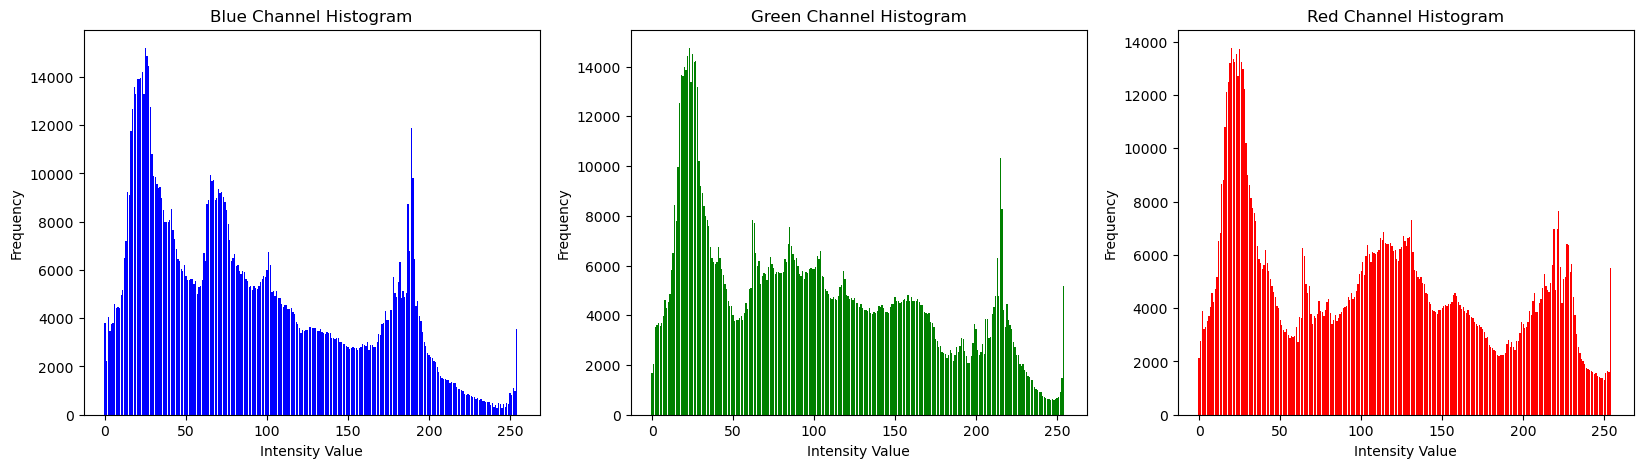

In [16]:
def histogram_colored_plot (image):

    histogram_b = np.zeros(256, dtype=int)
    histogram_g = np.zeros(256, dtype=int)
    histogram_r = np.zeros(256, dtype=int)
    
    Blue = image[: , : , 0]
    Green = image[: , : , 1]
    Red = image[: , : , 2]
    
    for i in range (255):
        histogram_b[i] = np.sum(Blue == i)
        histogram_g[i] = np.sum(Green == i)
        histogram_r[i] = np.sum(Red == i)
    
        
    return histogram_b , histogram_g , histogram_r

Blue_hist , Green_hist , Red_hist = histogram_colored_plot(image_part2)

histograms = [Blue_hist, Green_hist, Red_hist]
colors = ['blue', 'green', 'red']
titles = ['Blue Channel Histogram', 'Green Channel Histogram', 'Red Channel Histogram']

plt.figure(figsize=(20, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.bar(range(256), histograms[i], color=colors[i])
    plt.title(titles[i])
    plt.xlabel("Intensity Value")
    plt.ylabel("Frequency")

plt.show()

# Q2) Histogram (gray image)

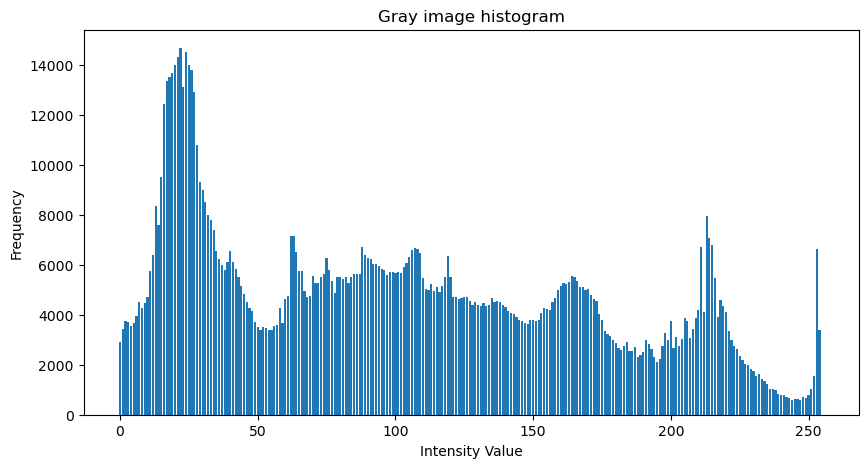

In [17]:
def histogram_gray_plot (image):

    histogram_gray = np.zeros(256, dtype=int)
    
    gray_image = gray_image_func(image) 
    
    for i in range (256):
        histogram_gray[i] = np.sum(gray_image == i)
    #histogram_gray = np.bincount(gray_image.flatten(), minlength=256)
        
    return histogram_gray

histogram_gray = histogram_gray_plot(image_part2)

plt.figure(figsize=(10, 5))
plt.bar(range(256),histogram_gray)
plt.title("Gray image histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")

plt.show()

# check gray histogram

In [18]:
#image = cv2.imread("Part1/1.jpg", cv2.IMREAD_GRAYSCALE)
"""   
pixel_values = contrast_decreased.flatten()

plt.figure()
plt.title("Grayscale Histogram of Low contrast image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(pixel_values, bins=256, range=(0, 256), color='gray')    
plt.show()
"""

'   \npixel_values = contrast_decreased.flatten()\n\nplt.figure()\nplt.title("Grayscale Histogram of Low contrast image")\nplt.xlabel("Pixel Intensity")\nplt.ylabel("Frequency")\nplt.hist(pixel_values, bins=256, range=(0, 256), color=\'gray\')    \nplt.show()\n'

# Q3) equalizing histogram

True

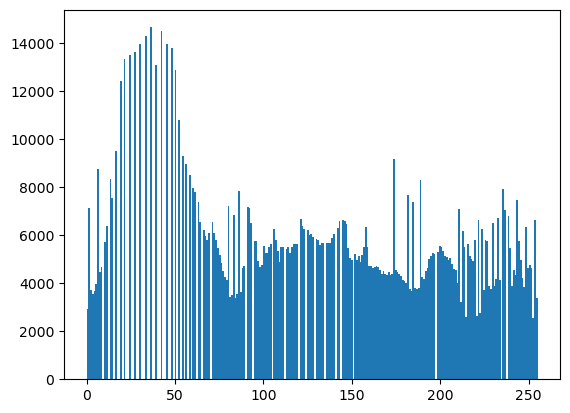

In [19]:
equalized_image = cv2.equalizeHist(gray_image_part2_q2)

plt.hist(equalized_image.flatten(), bins=256)
cv2.imwrite(os.path.join(output_part2_q2, 'equalgray_image.jpg'), equalized_image)

#print(equalized_image)
#gray_image_part2_q2

# Q4) fourier transform of image

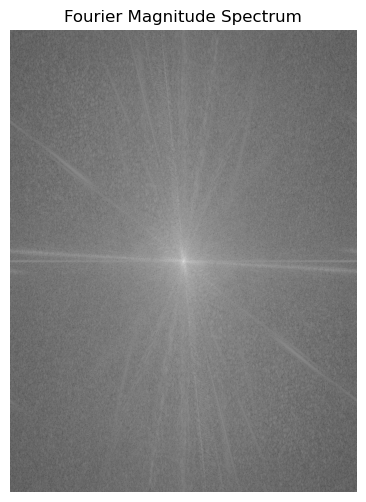

In [20]:
f_transform = np.fft.fft2(gray_image_part2_q2)
f_shifted = np.fft.fftshift(f_transform)

magnitude_spectrum = np.log(np.abs(f_shifted) + 1)

plt.figure(figsize=(12, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Magnitude Spectrum")
plt.axis("off")

plt.show()

# PART 3

In [21]:
input_image_part3 = 'Part1/1.jpg'
image_part3 = cv2.imread(input_image_part3)

height, width, channels = image_part3.shape
size = f"{width} x {height}"
image_format = input_image_part3.split('.')[-1].upper()  

compressed_formats = ['JPEG', 'JPG', 'PNG', 'GIF']
is_compressed = image_format in compressed_formats


image_properties = {
    'Property': ['Size', 'Channels', 'Image Format', 'Is Compressed'],
    'Value': [size, channels, image_format, is_compressed]
}

df = pd.DataFrame(image_properties)
print(df)

        Property       Value
0           Size  960 x 1280
1       Channels           3
2   Image Format         JPG
3  Is Compressed        True


# PART 4

In [22]:
input_image_part41 = 'Part1/1.jpg'
input_image_part42 = 'Part1/2.jpg'
input_image_part43 = 'Part1/3.jpg'
#input_image_part44 = 'Part1/4.jpg'
input_image_part45 = 'Part1/5.jpg'

image_part41 = cv2.imread(input_image_part41)
image_part42 = cv2.imread(input_image_part42)
image_part43 = cv2.imread(input_image_part43)
#image_part44 = cv2.imread(input_image_part44)
image_part45 = cv2.imread(input_image_part45)

output_part4 = 'Part4'

# Histogram matching

In [23]:
hist1 = (histogram_gray_plot(image_part41)).astype('float32')
hist2 = (histogram_gray_plot(image_part42)).astype('float32')
hist3 = (histogram_gray_plot(image_part43)).astype('float32')
hist4 = (histogram_gray_plot(image_part45)).astype('float32')
#hist4 = (histogram_gray_plot(image_part45)).reshape(256,1)

#hist1 = cv2.calcHist([image_part41], [0], None, [256], [0,256])
#hist2 = cv2.calcHist([image_part42], [0], None, [256], [0,256])
#hist3 = cv2.calcHist([image_part43], [0], None, [256], [0,256])
#hist4 = cv2.calcHist([image_part45], [0], None, [256], [0,256])

cv2.normalize(hist1, None, 0, 1, cv2.NORM_MINMAX)
cv2.normalize(hist2, None, 0, 1, cv2.NORM_MINMAX)
cv2.normalize(hist3, None, 0, 1, cv2.NORM_MINMAX)
cv2.normalize(hist4, None, 0, 1, cv2.NORM_MINMAX)


similarity_score_1_2 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
similarity_score_1_3 = cv2.compareHist(hist1, hist3, cv2.HISTCMP_CORREL)
similarity_score_1_4 = cv2.compareHist(hist1, hist4, cv2.HISTCMP_CORREL)

print("Similarity score between image 1 and image 2:", similarity_score_1_2)
print("Similarity score between image 1 and image 3:", similarity_score_1_3)
print("Similarity score between image 1 and image 4:", similarity_score_1_4)



Similarity score between image 1 and image 2: 0.6905910553631619
Similarity score between image 1 and image 3: 0.6149220242099003
Similarity score between image 1 and image 4: 0.8682669191286333


# NCC (normalized cross correlation)

In [24]:
def normalized_cross_correlation(template, image_patch):
    
    template_mean = np.mean(template)
    image_patch_mean = np.mean(image_patch)
    
    template_centered = template - template_mean
    image_patch_centered = image_patch - image_patch_mean
    
    numerator = np.sum(template_centered * image_patch_centered)
    denominator = np.sqrt(np.sum(template_centered ** 2) * np.sum(image_patch_centered ** 2))
    
    if denominator == 0:
        return 0
    
    ncc = numerator / denominator
    return ncc

image1 = gray_image_func(image_part41)
image2 = gray_image_func(image_part42) 
image3 = gray_image_func(image_part43)
image4 = gray_image_func(image_part45)


#image1 = cv2.cvtColor(image_part41, cv2.COLOR_BGR2GRAY)
#image2 = cv2.cvtColor(image_part42, cv2.COLOR_BGR2GRAY)

ncc_value1 = normalized_cross_correlation(image1, image2)
print("NCC similarity:", ncc_value1)
ncc_value2 = normalized_cross_correlation(image1, image3)
print("NCC similarity:", ncc_value2)
ncc_value3 = normalized_cross_correlation(image1, image4)
print("NCC similarity:", ncc_value3)


NCC similarity: 0.3621893957535066
NCC similarity: 0.45671448100813383
NCC similarity: 0.43127906615617495


# NCCOEFF (Normalized Correlation Coefficient)

In [25]:
'''
image1 = gray_image_func(image_part41)
image2 = gray_image_func(image_part42) 
image3 = gray_image_func(image_part43)
image4 = gray_image_func(image_part45)

result1 = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)
result2 = cv2.matchTemplate(image1, image3, cv2.TM_CCOEFF_NORMED)
result3 = cv2.matchTemplate(image1, image4, cv2.TM_CCOEFF_NORMED)


print("NCCOEFF similarity score:", result1)
print("NCCOEFF similarity score:", result2)
print("NCCOEFF similarity score:", result3)
'''

'\nimage1 = gray_image_func(image_part41)\nimage2 = gray_image_func(image_part42) \nimage3 = gray_image_func(image_part43)\nimage4 = gray_image_func(image_part45)\n\nresult1 = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)\nresult2 = cv2.matchTemplate(image1, image3, cv2.TM_CCOEFF_NORMED)\nresult3 = cv2.matchTemplate(image1, image4, cv2.TM_CCOEFF_NORMED)\n\n\nprint("NCCOEFF similarity score:", result1)\nprint("NCCOEFF similarity score:", result2)\nprint("NCCOEFF similarity score:", result3)\n'

# SSIM (Structural Similarity Index)

In [26]:
"""
image1 = cv2.imread('Part1/1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Part1/4.jpg', cv2.IMREAD_GRAYSCALE)

image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

similarity_score, diff_image = ssim(image1, image2, full=True)
diff_image = (diff_image * 255).astype("uint8")  # Scale difference image for visualization

print("SSIM Similarity Score:", similarity_score)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(diff_image, cmap='gray')
plt.title("Difference Image (SSIM)")
plt.axis("off")
plt.show()
"""

'\nimage1 = cv2.imread(\'Part1/1.jpg\', cv2.IMREAD_GRAYSCALE)\nimage2 = cv2.imread(\'Part1/4.jpg\', cv2.IMREAD_GRAYSCALE)\n\nimage2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))\n\nsimilarity_score, diff_image = ssim(image1, image2, full=True)\ndiff_image = (diff_image * 255).astype("uint8")  # Scale difference image for visualization\n\nprint("SSIM Similarity Score:", similarity_score)\n\n\nplt.figure(figsize=(10, 5))\nplt.subplot(1, 2, 1)\nplt.imshow(image1, cmap=\'gray\')\nplt.title("Image 1")\nplt.axis("off")\n\nplt.subplot(1, 2, 2)\nplt.imshow(diff_image, cmap=\'gray\')\nplt.title("Difference Image (SSIM)")\nplt.axis("off")\nplt.show()\n'

# Binary template matching

Manual threshold

In [27]:
def template_matching (image , imagee , th1 , th2):
    image1 = binary_image_func(image , th1)
    image2 = binary_image_func(imagee , th2)

    image1 = (image1 / 255).astype(np.uint8)
    image2 = (image2 / 255).astype(np.uint8)

    intersection = np.logical_and(image1, image2).sum()
    union = np.logical_or(image1, image2).sum()
    #union = 255
    jaccard_index = intersection / union if union != 0 else 0

    dice_coefficient = (2 * intersection) / (image1.sum() + image2.sum()) if (image1.sum() + image2.sum()) != 0 else 0

    return print("Jaccard Index:", jaccard_index) , print("Dice Coefficient:", dice_coefficient)

print("Similarity score between image 1 and image 2:")
template_matching(image_part41 , image_part42 , 128 , 128)
print("Similarity score between image 1 and image 3:")
template_matching(image_part41 , image_part43 , 128 , 128)
print("Similarity score between image 1 and image 4:")
template_matching(image_part41 , image_part45 , 128 , 128)

Similarity score between image 1 and image 2:
Jaccard Index: 0.3320599874288446
Dice Coefficient: 0.49856611648517435
Similarity score between image 1 and image 3:
Jaccard Index: 0.35775557413932274
Dice Coefficient: 0.5269808218111761
Similarity score between image 1 and image 4:
Jaccard Index: 0.38468514617964367
Dice Coefficient: 0.555628327841882


(None, None)

OTSU threshold

In [28]:
def template_matching_otsu (imagee , imageee):
    gray_image1 = cv2.cvtColor(imagee, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(imageee, cv2.COLOR_BGR2GRAY)

    _, binary_image1 = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, binary_image2 = cv2.threshold(gray_image2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
    image1 = (binary_image1 / 255).astype(np.uint8)
    image2 = (binary_image2 / 255).astype(np.uint8)

    intersection = np.logical_and(image1, image2).sum()
    union = np.logical_or(image1, image2).sum()

    jaccard_index = intersection / union if union != 0 else 0
    dice_coefficient = (2 * intersection) / (image1.sum() + image2.sum()) if (image1.sum() + image2.sum()) != 0 else 0
    return print("Jaccard Index:", jaccard_index) , print("Dice Coefficient:", dice_coefficient)
    
print("Similarity score between image 1 and image 2:")
template_matching_otsu(image_part41 , image_part42)
print("Similarity score between image 1 and image 3:")
template_matching_otsu(image_part41 , image_part43)
print("Similarity score between image 1 and image 4:")
template_matching_otsu(image_part41 , image_part45)    

Similarity score between image 1 and image 2:
Jaccard Index: 0.3868442332962701
Dice Coefficient: 0.5578769756669983
Similarity score between image 1 and image 3:
Jaccard Index: 0.43111900085794946
Dice Coefficient: 0.6024921765408684
Similarity score between image 1 and image 4:
Jaccard Index: 0.4462064005277038
Dice Coefficient: 0.6170715333093372


(None, None)